In [90]:
# import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [91]:
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,1,73,50,10,0,23.0,0.248,21,0
2,2,84,0,0,0,0.0,0.304,21,0
3,1,80,55,0,0,19.1,0.258,21,0
4,2,142,82,18,64,24.7,0.761,21,0


In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.duplicated().sum()

np.int64(0)

From the above data exploration analysis we find that:
- There are 9 cols and 768 rows.
- There is no NULL values in the dataset.
- Looks like there are outliers in many cols.
- No duplicated record.
- All columns data type either int or float.
- The data need to be standarized/scaled.

In [92]:
fig = px.histogram(df, x='Outcome', color_discrete_map= {1:'orange', 2:'green'}, color='Outcome', width=600, height=400)
fig.update_layout(title='Count of diabetes or No diabetes', xaxis_title='Diabetes')
fig.show()

In [93]:
no_diabetes = round((len(df[df['Outcome']== 0]) / len(df)) * 100,2)
with_diabetes = round((len(df[df['Outcome']== 1]) / len(df)) * 100, 2)
print(f'percentage of no_diabetes = {no_diabetes}')
print(f'percentage of with_diabetes = {with_diabetes}')

percentage of no_diabetes = 65.1
percentage of with_diabetes = 34.9


- The outcome is not balanced. It's biase to no_diabetes.

Feature Engineering
Age Grouping

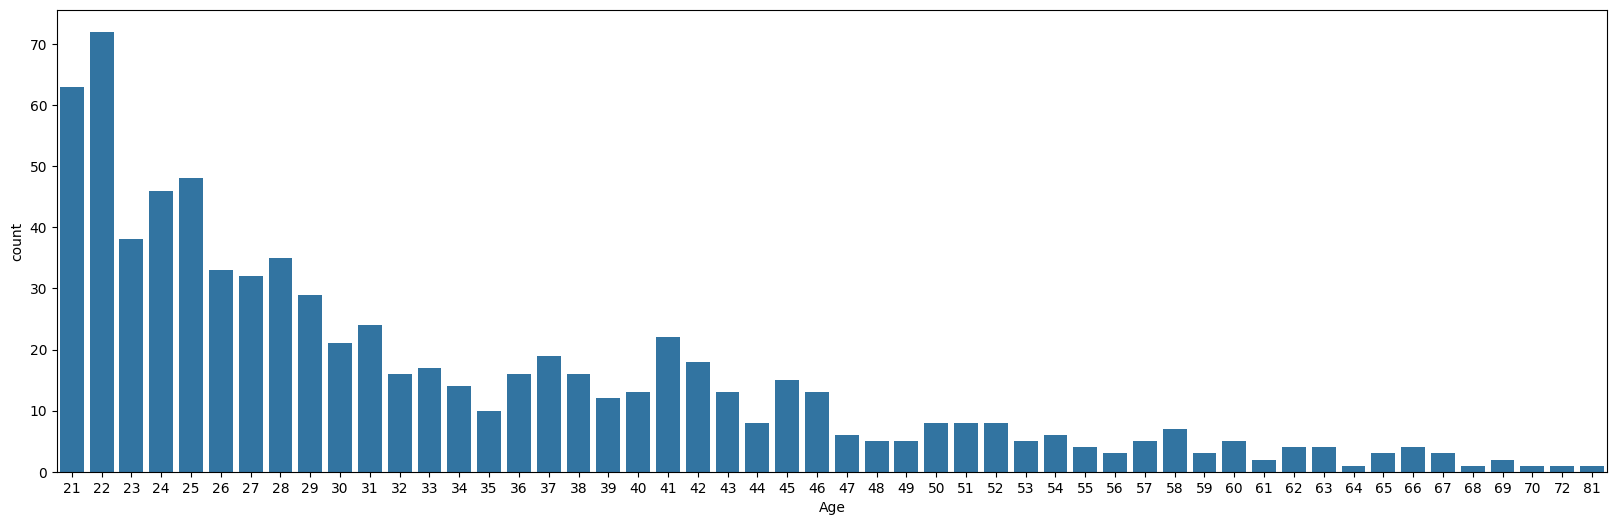

In [94]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Age', data=df)
plt.show()

In [97]:
bins = [20, 25, 30, 35, 40, 45, 50, 60, 81]
labels = ['20-24','25-29', '30-34', '35-39', '40-44', '45-49', '50-59', '60-81' ]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,1,89,66,23,94,28.1,0.167,21,0,20-24
1,1,73,50,10,0,23.0,0.248,21,0,20-24
2,2,84,0,0,0,0.0,0.304,21,0,20-24
3,1,80,55,0,0,19.1,0.258,21,0,20-24
4,2,142,82,18,64,24.7,0.761,21,0,20-24


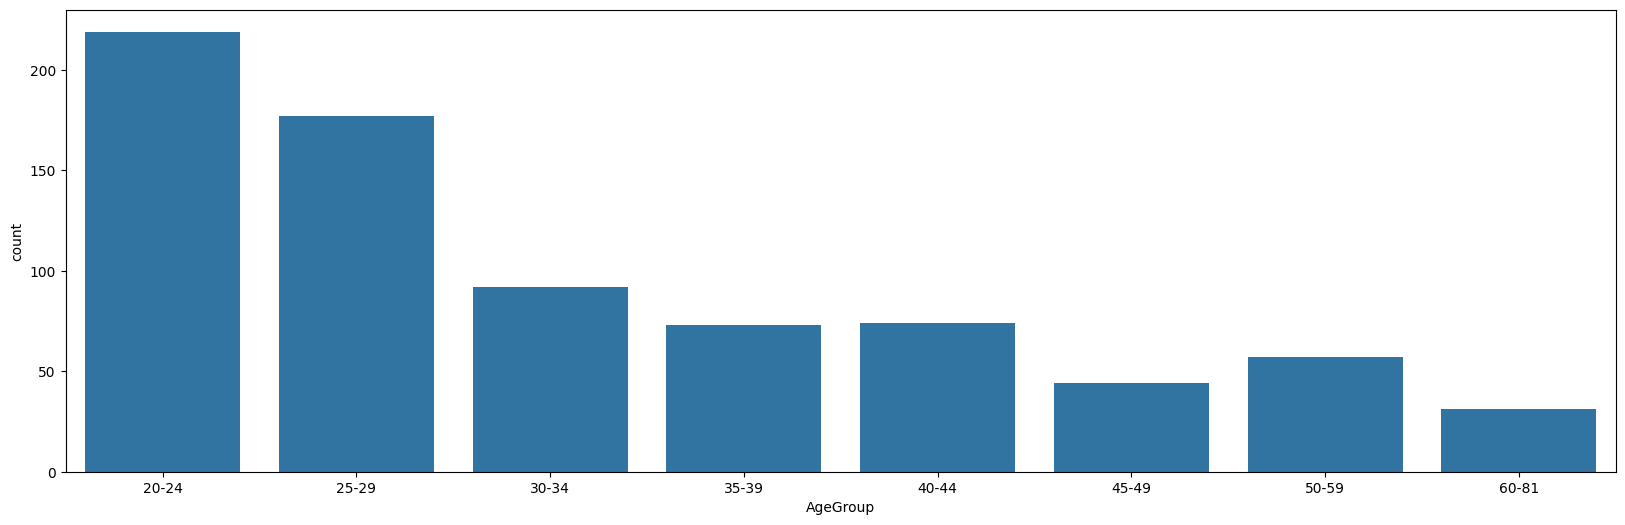

In [98]:
plt.figure(figsize=(20, 6))
sns.countplot(x='AgeGroup', data=df)
plt.show()

## 1. Dealing with the outliers

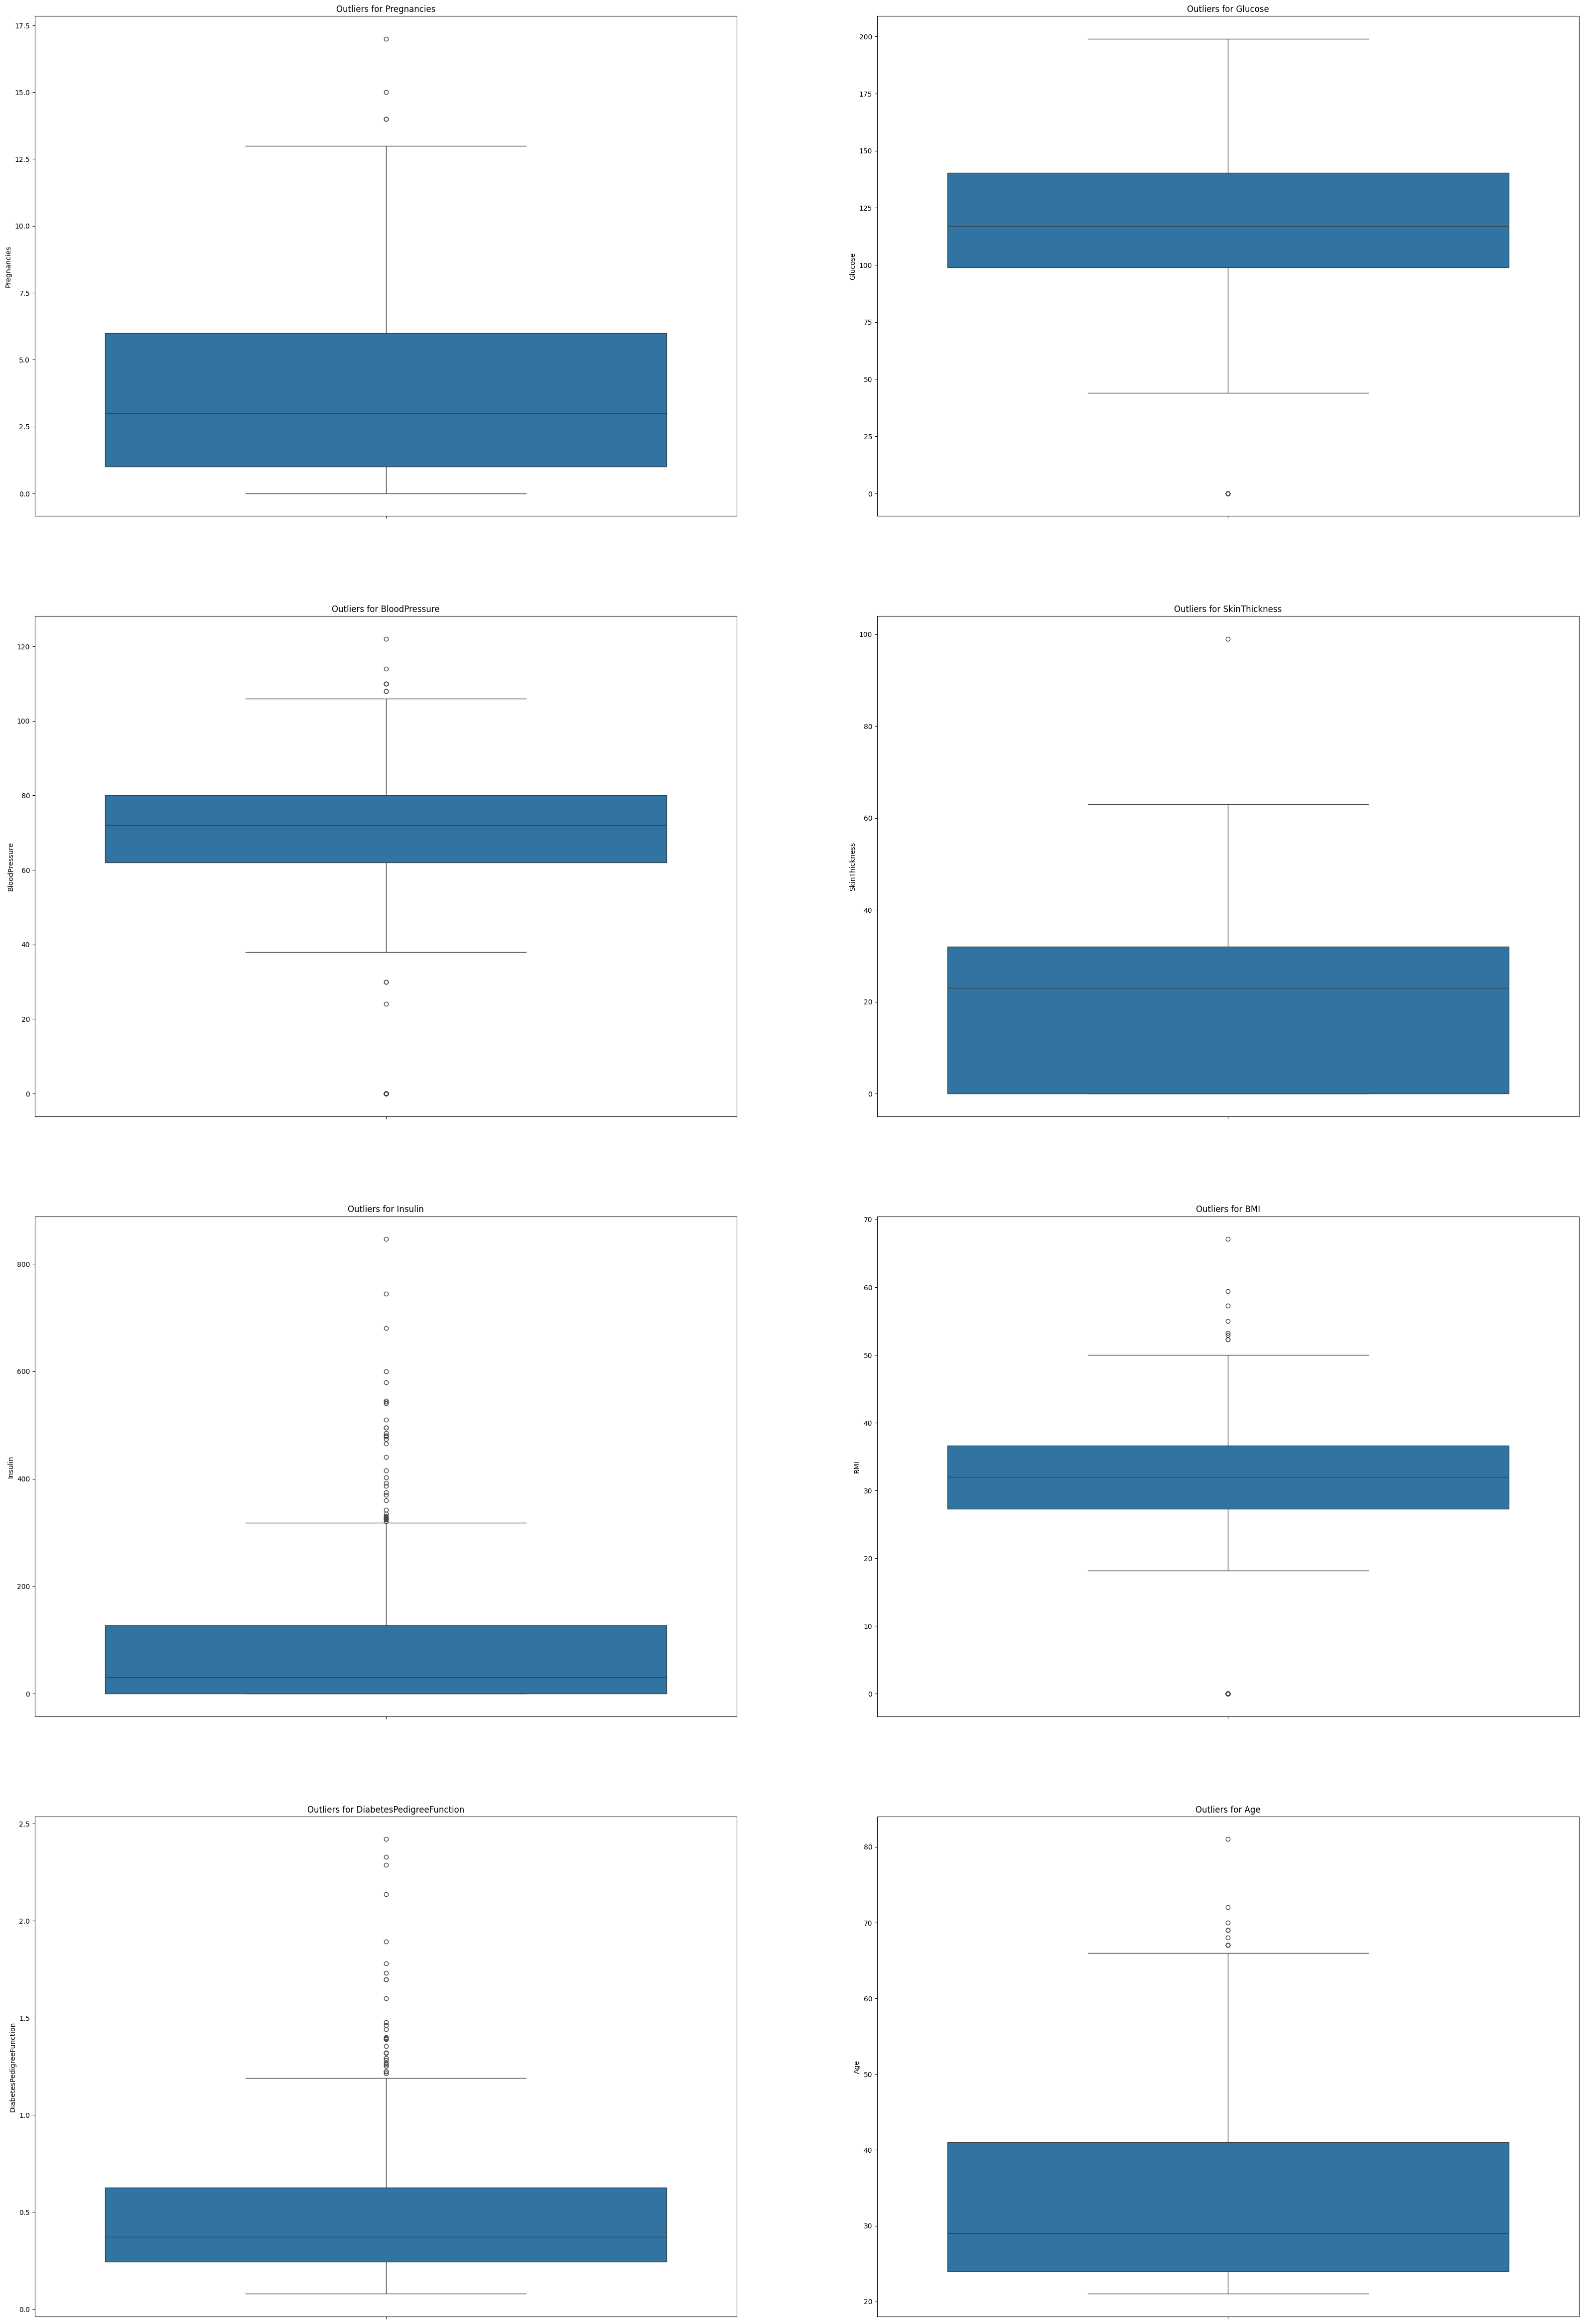

In [99]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(40,60))
axes = axes.flatten()
df_col = df.drop('Outcome', axis=1)

for ax, column in zip(axes, df_col.columns):
    sns.boxplot(y=df[column], ax=ax)
    ax.set_title(f'Outliers for {column}')

plt.show()

### Blood Pressure (BP)

In [100]:
fig = px.box(df, y='BloodPressure',width=600, height=400)
fig.show()

<Axes: xlabel='BloodPressure', ylabel='Density'>

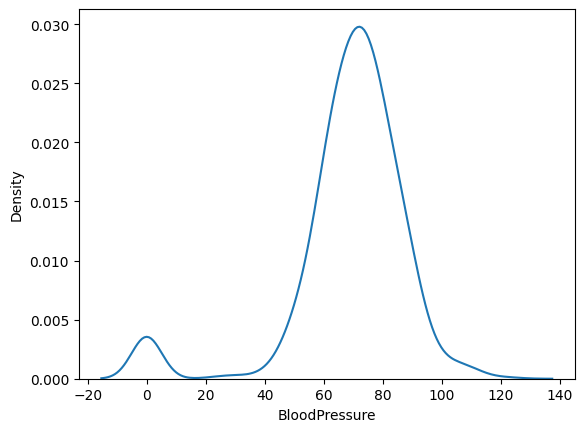

In [101]:
sns.kdeplot(data=df, x='BloodPressure')

In [102]:
print(f'The minimum BP {df['BloodPressure'].min()}')
print(f'The maximum BP {df['BloodPressure'].max()}')
print(f'The average BP {df['BloodPressure'].mean()}')
print(f'The median BP {df['BloodPressure'].median()}')
print(f'The mode BP {df['BloodPressure'].mode()}')

The minimum BP 0
The maximum BP 122
The average BP 69.10546875
The median BP 72.0
The mode BP 0    70
Name: BloodPressure, dtype: int64


Blood pressure for a living human being can't be zero, so we should either:
- Remove all the records where BP is 0.
- Update the value with the avg, median or mode. 

In [103]:
# finding the records that have zero results for BP, ST and BMI
df[(df['BloodPressure'] == 0) & (df['SkinThickness'] == 0) & (df['BMI'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
2,2,84,0,0,0,0.0,0.304,21,0,20-24
71,2,74,0,0,0,0.0,0.102,22,0,20-24
106,3,80,0,0,0,0.0,0.174,22,0,20-24
173,7,105,0,0,0,0.0,0.305,24,0,20-24
248,0,94,0,0,0,0.0,0.256,25,0,25-29
291,6,114,0,0,0,0.0,0.189,26,0,25-29
415,10,115,0,0,0,0.0,0.261,30,1,30-34


In [104]:
# drop all rows where Blood Pressure, Skin Thickness and BMI are 0

df_update1 = df[(df['BloodPressure'] > 0) | (df['SkinThickness'] > 0) | (df['BMI'] > 0)]
#df_update1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,1,89,66,23,94,28.1,0.167,21,0,20-24
1,1,73,50,10,0,23.0,0.248,21,0,20-24
3,1,80,55,0,0,19.1,0.258,21,0,20-24
4,2,142,82,18,64,24.7,0.761,21,0,20-24
5,0,125,96,0,0,22.5,0.262,21,0,20-24
...,...,...,...,...,...,...,...,...,...,...
763,5,132,80,0,0,26.8,0.186,69,0,60-81
764,5,136,82,0,0,0.0,0.640,69,0,60-81
765,4,145,82,18,0,32.5,0.235,70,1,60-81
766,2,119,0,0,0,19.6,0.832,72,0,60-81


In [105]:
# finding all rows where BP, ST are zeros
df_update1[(df_update1['BloodPressure'] == 0) & (df_update1['SkinThickness'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
125,0,99,0,0,0,25.0,0.253,22,0,20-24
153,3,116,0,0,0,23.5,0.187,23,0,20-24
154,2,99,0,0,0,22.2,0.108,23,0,20-24
158,4,132,0,0,0,32.9,0.302,23,1,20-24
212,0,119,0,0,0,32.4,0.141,24,1,20-24
231,0,138,0,0,0,36.3,0.933,25,1,25-29
257,0,73,0,0,0,21.1,0.342,25,0,25-29
271,0,131,0,0,0,43.2,0.270,26,1,25-29
313,3,141,0,0,0,30.0,0.761,27,1,25-29
337,2,146,0,0,0,27.5,0.240,28,1,25-29


In [106]:
# drop the records where BP and ST are zero
df_update2 = df_update1[(df_update1['BloodPressure'] > 0) | (df_update1['SkinThickness'] > 0)]
len(df_update2)

735

In [107]:
# finding all records where ST and BMI are zeros
df_update2[(df_update2['SkinThickness']==0) & (df_update2['BMI'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
708,8,125,96,0,0,0.0,0.232,54,1,50-59
764,5,136,82,0,0,0.0,0.640,69,0,60-81


In [108]:
# drop the records where BMI and ST are zero
df_update3 = df_update2[(df_update2['BMI'] > 0) | (df_update2['SkinThickness'] > 0)]
len(df_update3)

733

In [109]:
# finding all records where BP and BMI are zeros
df_update3[(df_update3['BloodPressure']==0) & (df_update3['BMI'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup


In [111]:
# two records remaning, we will try to impute with median value
df_update3[df_update3['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
225,2,87,0,23,0,28.9,0.773,25,0,25-29
632,13,129,0,30,0,39.9,0.569,44,1,40-44


<Axes: xlabel='BloodPressure', ylabel='Density'>

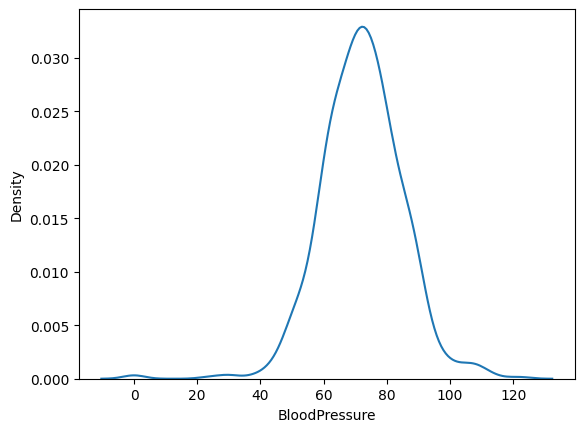

In [112]:
sns.kdeplot(data=df_update3, x='BloodPressure')

In [113]:
print(f'Minimum BP {df_update3['BloodPressure'].min()}')
print(f'Maximum BP {df_update3['BloodPressure'].max()}')
print(f'The average BP {df_update3['BloodPressure'].mean()}')
print(f'The median BP {df_update3['BloodPressure'].median()}')
print(f'The mode BP {df_update3['BloodPressure'].mode()}')

Minimum BP 0
Maximum BP 122
The average BP 72.16234652114598
The median BP 72.0
The mode BP 0    70
Name: BloodPressure, dtype: int64


In [127]:
# find the median per Age Group
filtered_df_0 = df_update3[(df_update3['BloodPressure'] > 0) & (df_update3['Outcome'] == 0)]
median_BP_ageGroup_0 = filtered_df_0.groupby('AgeGroup', observed=False)['BloodPressure'].median()
median_BP_ageGroup_0

AgeGroup
20-24    64.0
25-29    70.0
30-34    71.0
35-39    74.0
40-44    74.0
45-49    78.0
50-59    78.0
60-81    78.0
Name: BloodPressure, dtype: float64

In [134]:
filtered_df_1 = df_update3[(df_update3['BloodPressure'] > 0) & (df_update3['Outcome'] == 1)]
median_BP_ageGroup_1 = filtered_df_1.groupby('AgeGroup', observed=False)['BloodPressure'].median()
median_BP_ageGroup_1

AgeGroup
20-24    70.0
25-29    71.0
30-34    74.0
35-39    74.0
40-44    76.0
45-49    78.0
50-59    78.0
60-81    82.0
Name: BloodPressure, dtype: float64

In [129]:
df_update3.loc[(df_update3['BloodPressure'] == 0) & (df_update3['Outcome'] == 0), 'BloodPressure'] = df_update3.loc[(df_update3['BloodPressure'] == 0) & (df_update3['Outcome'] == 0), 'AgeGroup'].map(median_BP_ageGroup_0)
df_update3[df_update3['BloodPressure'] == 0]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
632,13,129,0,30,0,39.9,0.569,44,1,40-44


In [135]:
df_update3.loc[(df_update3['BloodPressure'] == 0) & (df_update3['Outcome'] == 1), 'BloodPressure'] = df_update3.loc[(df_update3['BloodPressure'] == 0) & (df_update3['Outcome'] == 1), 'AgeGroup'].map(median_BP_ageGroup_1)
df_update3[df_update3['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup


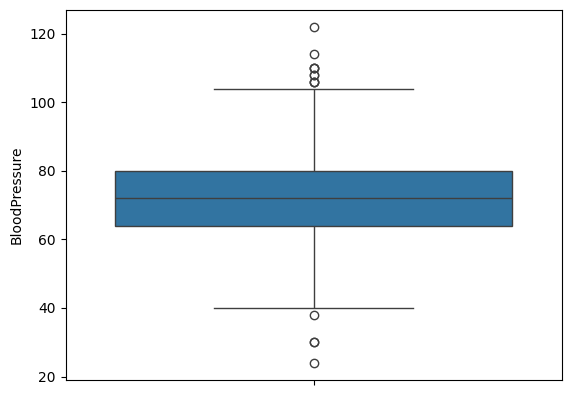

In [137]:
sns.boxplot(data=df_update3, y='BloodPressure')
plt.show()

## Skin Thinkness (ST)

<Axes: xlabel='SkinThickness', ylabel='Density'>

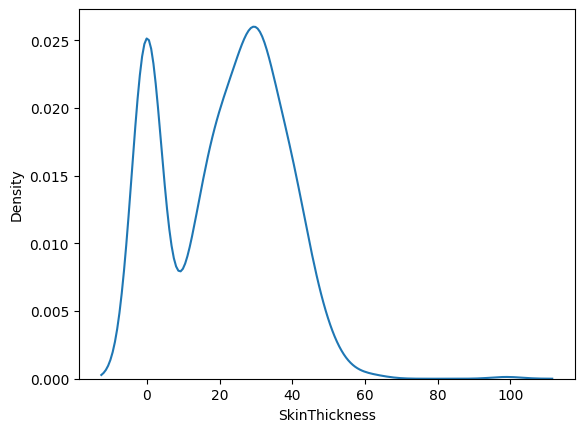

In [28]:
sns.kdeplot(data=df_update3, x='SkinThickness')

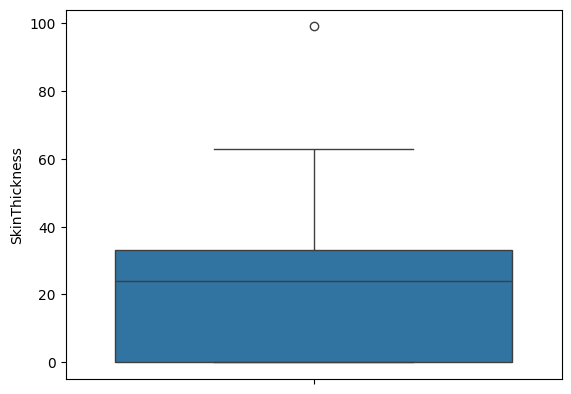

In [138]:
sns.boxplot(data=df_update3, y='SkinThickness')
plt.show()

In [139]:
print(f'The maximum skin thickness {df_update3['SkinThickness'].max()}')
print(f'The minimum skin thickness {df_update3['SkinThickness'].min()}')
print(f'The average skin thickness {df_update3['SkinThickness'].mean()}')
print(f'The median skin thickness {df_update3['SkinThickness'].median()}')
print(f'The mode skin thickness {df_update3['SkinThickness'].mode()}')

The maximum skin thickness 99
The minimum skin thickness 0
The average skin thickness 21.51705320600273
The median skin thickness 24.0
The mode skin thickness 0    0
Name: SkinThickness, dtype: int64


In [140]:
df_update3[df_update3['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
3,1,80,55,0,0,19.1,0.258,21,0,20-24
5,0,125,96,0,0,22.5,0.262,21,0,20-24
13,3,111,62,0,0,22.6,0.142,21,0,20-24
14,1,105,58,0,0,24.3,0.187,21,0,20-24
20,0,102,52,0,0,25.1,0.078,21,0,20-24
...,...,...,...,...,...,...,...,...,...,...
759,4,146,78,0,0,38.5,0.520,67,1,60-81
760,8,194,80,0,0,26.1,0.551,67,0,60-81
761,0,57,60,0,0,21.7,0.735,67,0,60-81
762,8,91,82,0,0,35.6,0.587,68,0,60-81


In [144]:
# find the median per Age Group
filtered_ST_0 = df_update3[(df_update3['SkinThickness'] > 0) & (df_update3['Outcome'] == 0)]
median_ST_0 = filtered_ST_0.groupby('AgeGroup', observed=False )['SkinThickness'].median()
median_ST_0

AgeGroup
20-24    23.0
25-29    27.5
30-34    30.0
35-39    31.0
40-44    30.0
45-49    30.5
50-59    27.0
60-81    31.0
Name: SkinThickness, dtype: float64

In [145]:
filtered_ST_1 = df_update3[(df_update3['SkinThickness'] > 0) & (df_update3['Outcome'] == 1)]
median_ST_1 = filtered_ST_1.groupby('AgeGroup', observed=False )['SkinThickness'].median()
median_ST_1

AgeGroup
20-24    35.5
25-29    35.5
30-34    32.0
35-39    32.0
40-44    31.0
45-49    31.5
50-59    29.0
60-81    36.0
Name: SkinThickness, dtype: float64

In [146]:
df_update3.loc[(df_update3['SkinThickness'] == 0) & (df_update3['Outcome'] == 0), 'SkinThickness'] = df_update3.loc[(df_update3['SkinThickness'] == 0) & (df_update3['Outcome'] == 0), 'AgeGroup'].map(median_ST_0)
df_update3[df_update3['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
49,2,118,80,0.0,0,42.9,0.693,21,1,20-24
82,4,142,86,0.0,0,44.0,0.645,22,1,20-24
85,3,139,54,0.0,0,25.6,0.402,22,1,20-24
130,8,120,86,0.0,0,28.4,0.259,22,1,20-24
133,4,136,70,0.0,0,31.2,1.182,22,1,20-24
...,...,...,...,...,...,...,...,...,...,...
741,4,146,92,0.0,0,31.2,0.539,61,1,60-81
743,0,105,84,0.0,0,27.9,0.741,62,1,60-81
755,2,158,90,0.0,0,31.6,0.805,66,1,60-81
758,6,190,92,0.0,0,35.5,0.278,66,1,60-81


In [147]:
df_update3.loc[(df_update3['SkinThickness'] == 0) & (df_update3['Outcome'] == 1), 'SkinThickness'] = df_update3.loc[(df_update3['SkinThickness'] == 0) & (df_update3['Outcome'] == 1), 'AgeGroup'].map(median_ST_1)
df_update3[df_update3['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup


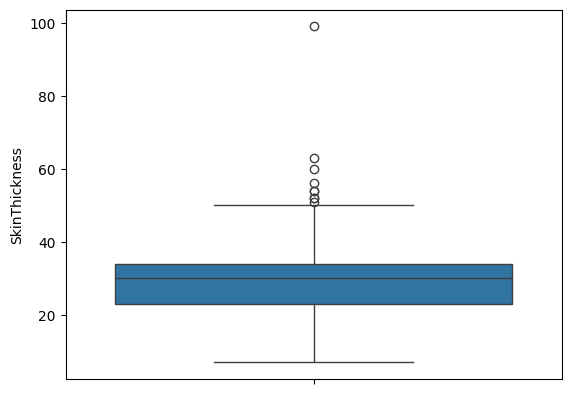

In [148]:
sns.boxplot(data=df_update3, y='SkinThickness')
plt.show()

In [149]:
print(f'The maximum skin thickness {df_update3['SkinThickness'].max()}')
print(f'The minimum skin thickness {df_update3['SkinThickness'].min()}')
print(f'The average skin thickness {df_update3['SkinThickness'].mean()}')
print(f'The median skin thickness {df_update3['SkinThickness'].median()}')
print(f'The mode skin thickness {df_update3['SkinThickness'].mode()}')

The maximum skin thickness 99.0
The minimum skin thickness 7.0
The average skin thickness 29.298772169167805
The median skin thickness 30.0
The mode skin thickness 0    31.0
Name: SkinThickness, dtype: float64


### BMI

<Axes: xlabel='BMI', ylabel='Density'>

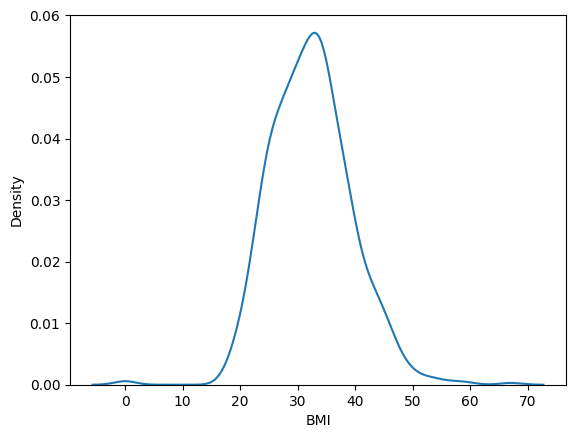

In [150]:
sns.kdeplot(data=df_update3, x='BMI')

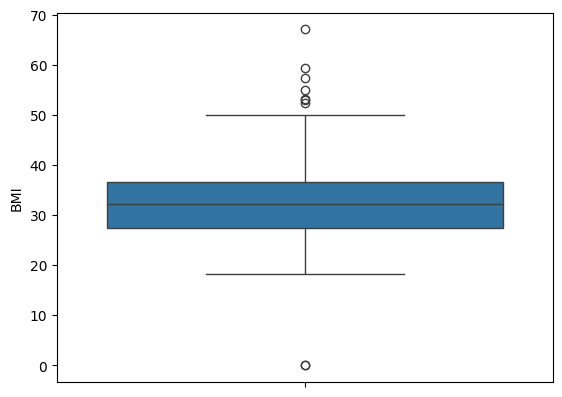

In [151]:
sns.boxplot(data=df_update3, y='BMI')
plt.show()

In [152]:
print(f'The maximum BMI {df_update3['BMI'].max()}')
print(f'The minimum BMI {df_update3['BMI'].min()}')
print(f'The average BMI {df_update3['BMI'].mean()}')
print(f'The median BMI {df_update3['BMI'].median()}')
print(f'The mode BMI {df_update3['BMI'].mode()}')

The maximum BMI 67.1
The minimum BMI 0.0
The average BMI 32.38663028649386
The median BMI 32.3
The mode BMI 0    32.0
Name: BMI, dtype: float64


In [161]:
df_update3[df_update3['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
9,0,102,75,23.0,0,0.0,0.572,21,0,20-24
28,0,118,64,23.0,89,0.0,1.731,21,0,20-24


In [158]:
filtered_BMI_0 = df_update3[(df_update3['BMI'] > 0) & (df_update3['Outcome'] == 0)]
median_BMI_0 = filtered_BMI_0.groupby('AgeGroup', observed=False )['BMI'].median()
median_BMI_0

AgeGroup
20-24    28.90
25-29    32.50
30-34    29.85
35-39    30.60
40-44    32.95
45-49    33.60
50-59    27.70
60-81    27.90
Name: BMI, dtype: float64

In [162]:
df_update3.loc[(df_update3['BMI'] == 0) & (df_update3['Outcome'] == 0), 'BMI'] = df_update3.loc[(df_update3['BMI'] == 0) & (df_update3['Outcome'] == 0), 'AgeGroup'].map(median_BMI_0)
#df_update3[df_update3['BMI'] == 0]

AssertionError: Something has gone wrong, please report a bug at https://github.com/pandas-dev/pandas/issues

## Insulin

<Axes: xlabel='Insulin', ylabel='Density'>

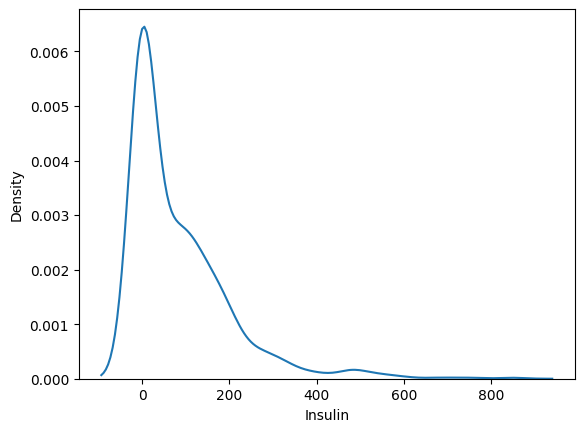

In [42]:
sns.kdeplot(data=df_update3, x='Insulin')

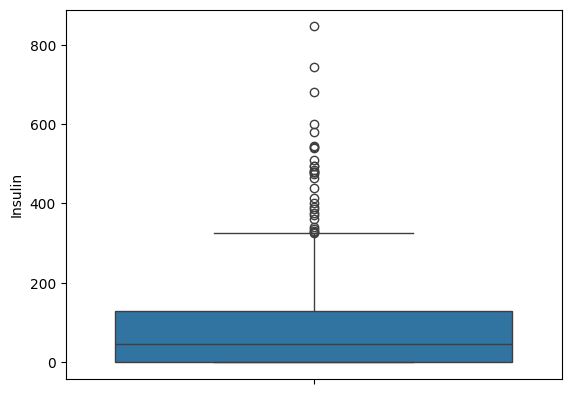

In [43]:
sns.boxplot(data=df_update3, y='Insulin')
plt.show()

In [44]:
print(f'Maximum skin insulin {df['Insulin'].max()}')
print(f'Minimum skin insulin {df['Insulin'].min()}')
print(f'average skin insulin {df['Insulin'].mean()}')
print(f'median skin insulin {df['Insulin'].median()}')
print(f'mode skin insulin {df['Insulin'].mode()}')

Maximum skin insulin 846
Minimum skin insulin 0
average skin insulin 79.79947916666667
median skin insulin 30.5
mode skin insulin 0    0
Name: Insulin, dtype: int64


## Glucose

<Axes: xlabel='Glucose', ylabel='Density'>

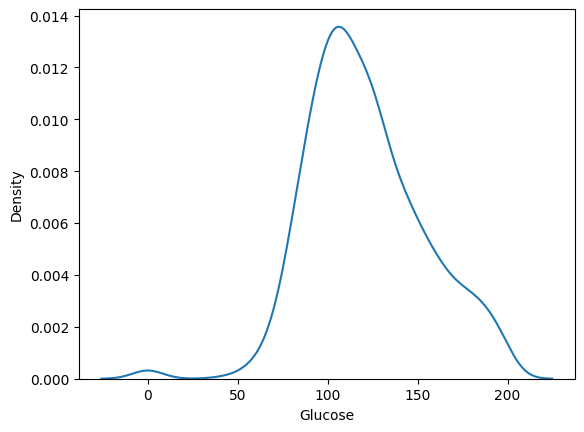

In [45]:
sns.kdeplot(data=df_update3, x='Glucose')

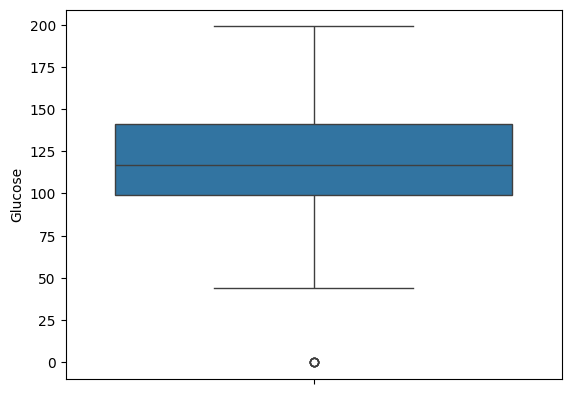

In [46]:
sns.boxplot(data=df_update3, y='Glucose')
plt.show()

In [47]:
print(f'The maximum glucose {df['Glucose'].max()}')
print(f'The minimum glucose {df['Glucose'].min()}')
print(f'The average glucose {df['Glucose'].mean()}')
print(f'The median glucose {df['Glucose'].median()}')
print(f'The mode glucose {df['Glucose'].mode()}')

The maximum glucose 199
The minimum glucose 0
The average glucose 120.89453125
The median glucose 117.0
The mode glucose 0     99
1    100
Name: Glucose, dtype: int64


In [48]:
df_update3[df_update3['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
12,1,0,74,20.0,23,27.7,0.299,21,0,20-24
69,1,0,48,20.0,0,24.7,0.140,22,0,20-24
90,1,0,68,35.0,0,32.0,0.389,22,0,20-24
524,5,0,80,32.0,0,41.0,0.346,37,1,35-39
590,6,0,68,41.0,0,39.0,0.727,41,1,40-44


In [49]:
filtered_df = df_update3[df_update3['Glucose'] > 0]
median_Glucose = filtered_df.groupby('AgeGroup', observed=False )['Glucose'].median()
median_Glucose

AgeGroup
20-24    108.0
25-29    112.0
30-34    119.5
35-39    129.0
40-44    122.0
45-49    123.5
50-59    139.5
60-81    142.0
Name: Glucose, dtype: float64

In [50]:
df_update3.loc[df_update3['Glucose'] == 0, 'Glucose'] = df_update3.loc[df_update3['Glucose'] == 0, 'AgeGroup'].map(median_Glucose)
df_update3[df_update3['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup


In [51]:
df_update4 = df_update3.drop('AgeGroup', axis=1)

In [52]:
df_update4 [(df_update4['Outcome']== 1)].median()

Pregnancies                   5.0000
Glucose                     140.0000
BloodPressure                74.0000
SkinThickness                31.0000
Insulin                      53.0000
BMI                          34.3000
DiabetesPedigreeFunction      0.4535
Age                          36.0000
Outcome                       1.0000
dtype: float64

In [53]:
df_update4[(df_update4['Outcome']== 0)].median()

Pregnancies                   2.00
Glucose                     108.00
BloodPressure                70.00
SkinThickness                29.00
Insulin                      45.00
BMI                          30.20
DiabetesPedigreeFunction      0.34
Age                          27.00
Outcome                       0.00
dtype: float64

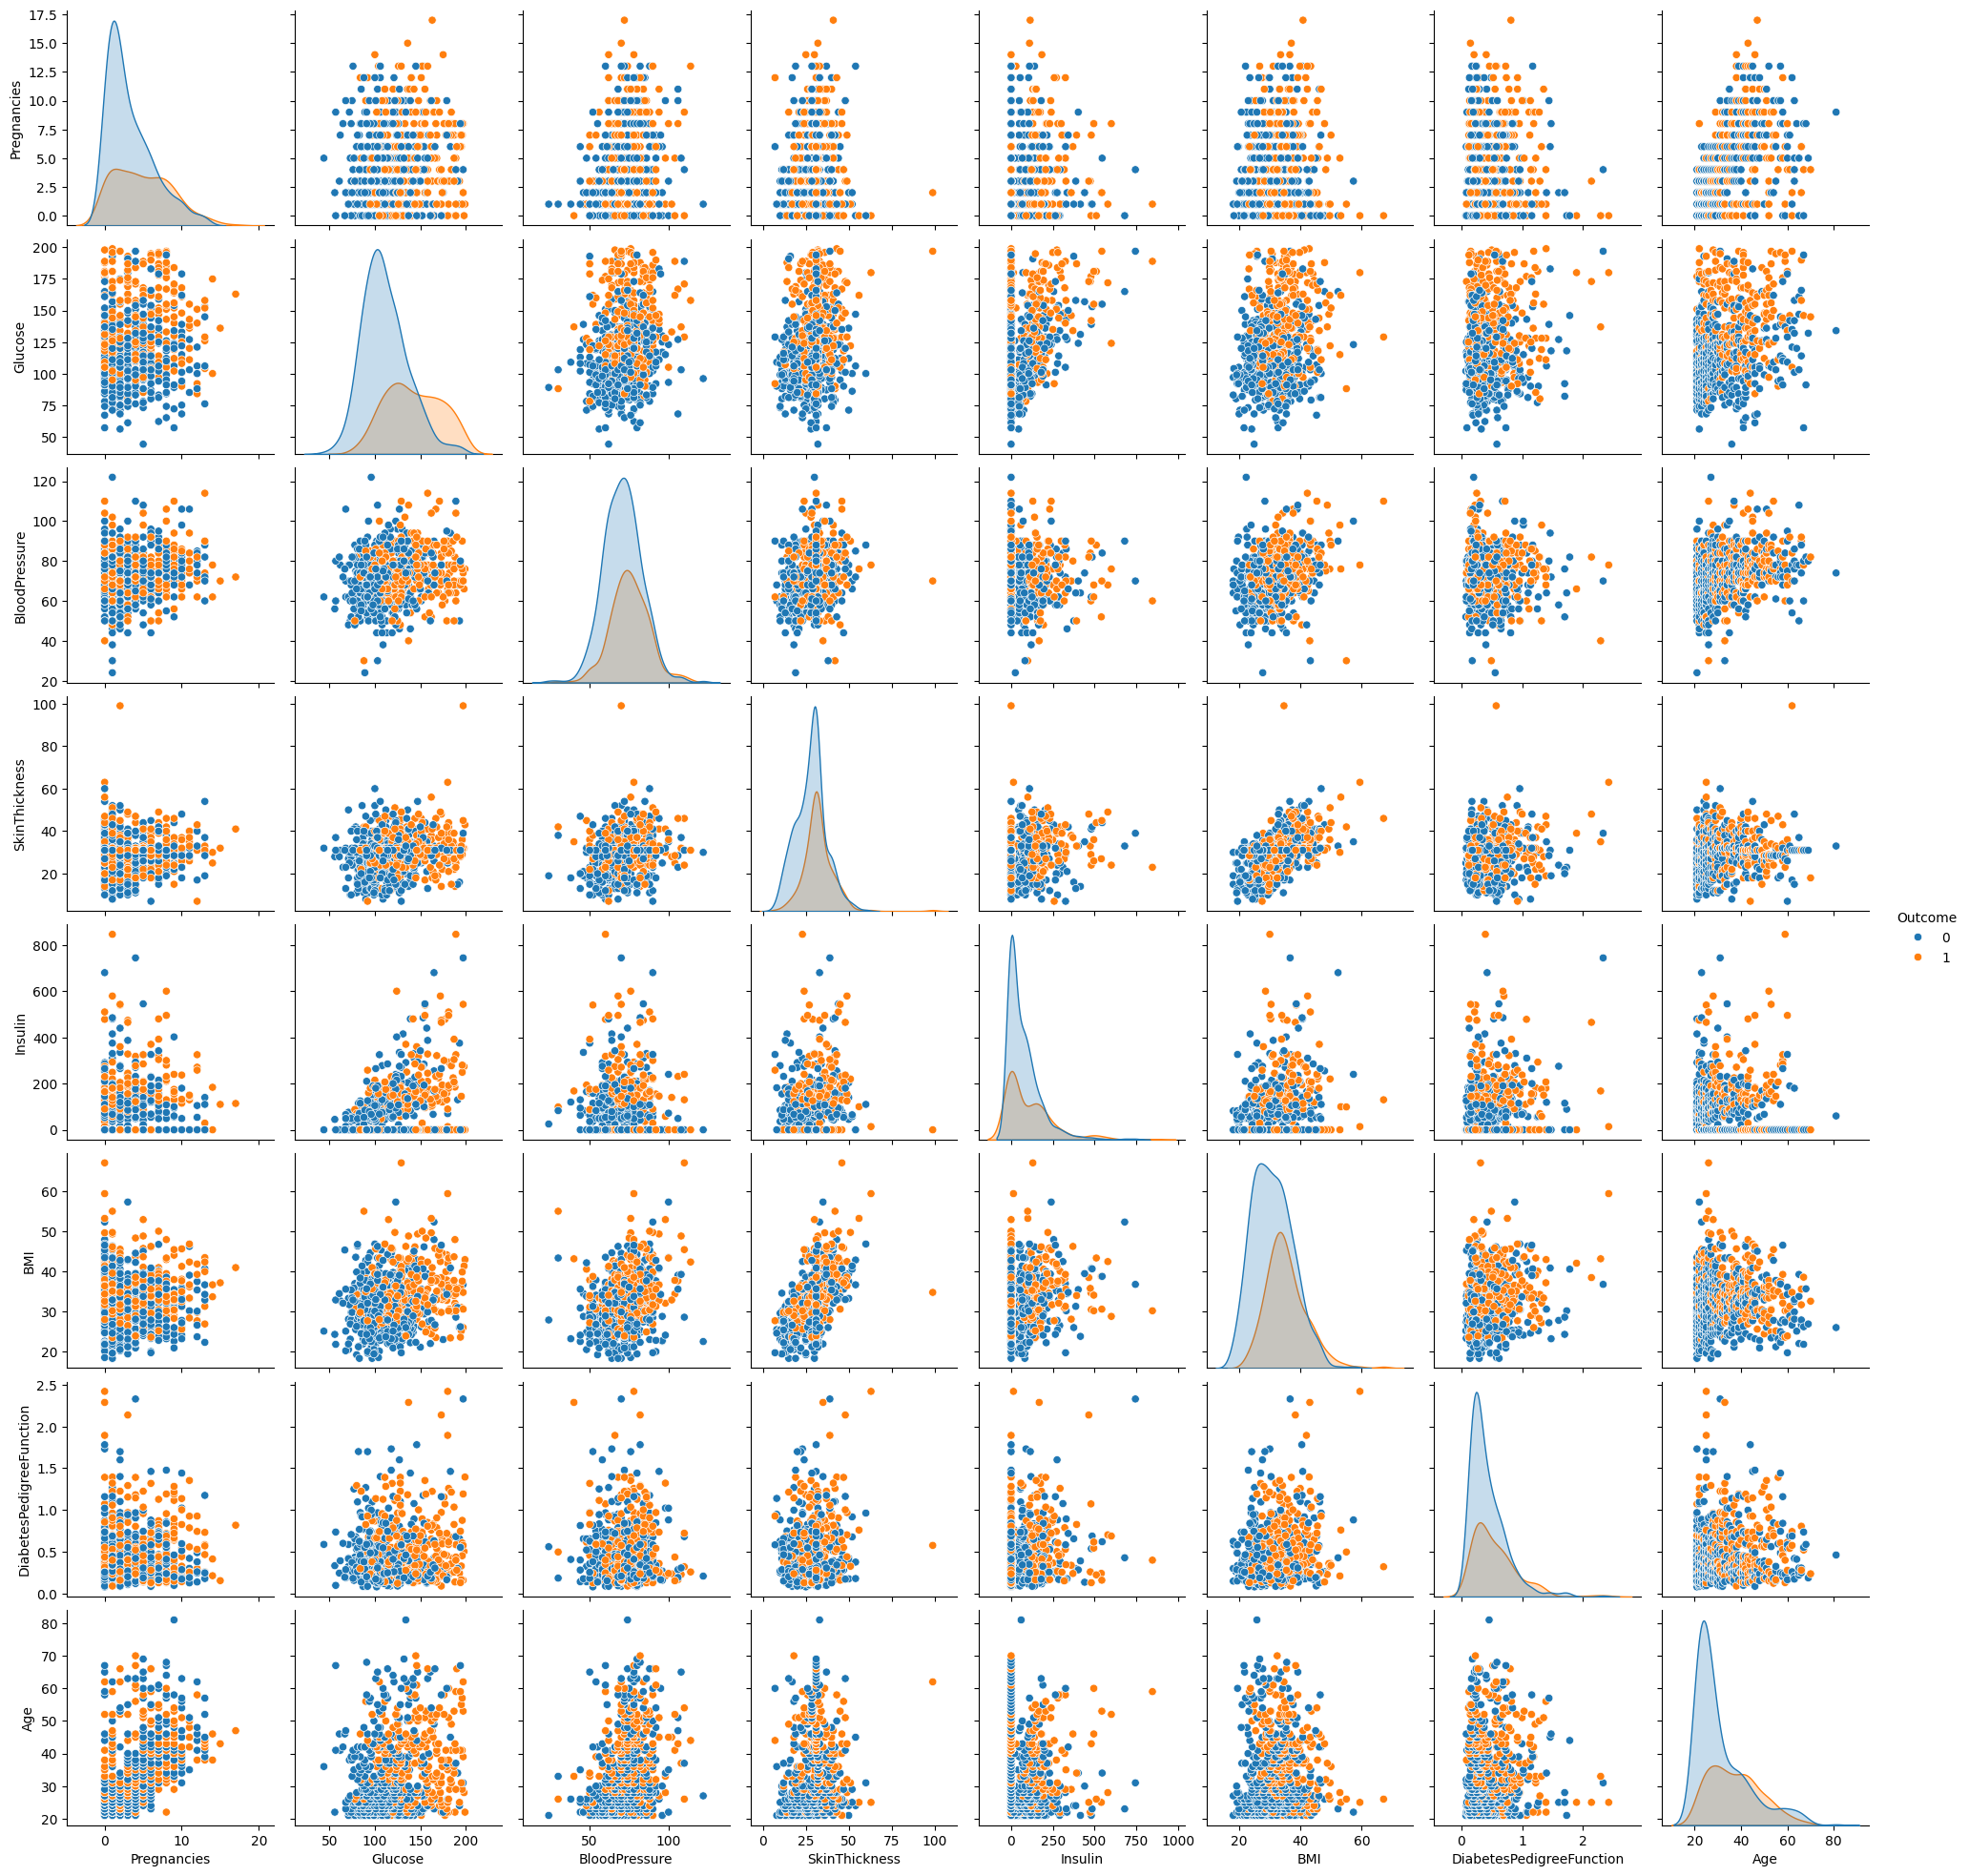

In [54]:
sns.pairplot(df_update3, hue="Outcome")
plt.show()

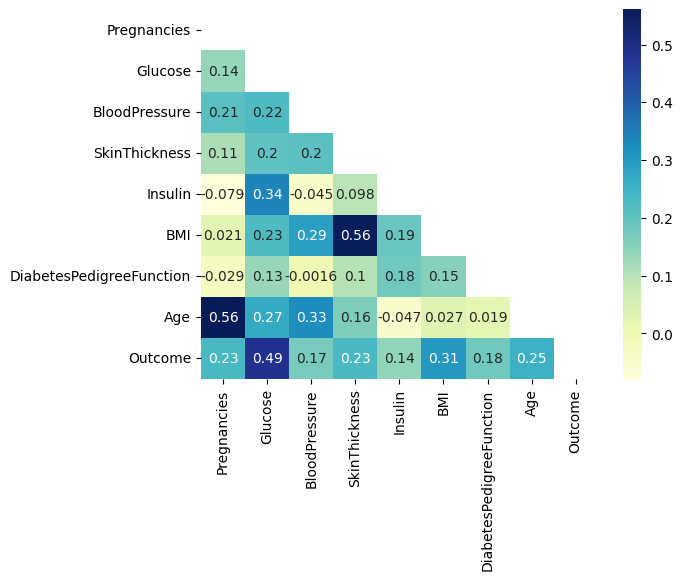

In [55]:
mask = np.triu(np.ones_like(df_update4.corr(), dtype=bool))
#df.corr()
dataplot = sns.heatmap(df_update4.corr(), mask=mask, cmap="YlGnBu", annot=True)
plt.show()

In [56]:
df_update3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,1,89,66,23.0,94,28.1,0.167,21,0,20-24
1,1,73,50,10.0,0,23.0,0.248,21,0,20-24
3,1,80,55,25.0,0,19.1,0.258,21,0,20-24
4,2,142,82,18.0,64,24.7,0.761,21,0,20-24
5,0,125,96,25.0,0,22.5,0.262,21,0,20-24


## Encoding AgeGroup Column

In [57]:
df_update5 = pd.get_dummies(df_update3, columns=['AgeGroup'])
df_update5.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup_20-24,AgeGroup_25-29,AgeGroup_30-34,AgeGroup_35-39,AgeGroup_40-44,AgeGroup_45-49,AgeGroup_50-59,AgeGroup_60-81
0,1,89,66,23.0,94,28.1,0.167,21,0,True,False,False,False,False,False,False,False
1,1,73,50,10.0,0,23.0,0.248,21,0,True,False,False,False,False,False,False,False
3,1,80,55,25.0,0,19.1,0.258,21,0,True,False,False,False,False,False,False,False
4,2,142,82,18.0,64,24.7,0.761,21,0,True,False,False,False,False,False,False,False
5,0,125,96,25.0,0,22.5,0.262,21,0,True,False,False,False,False,False,False,False


## Split the data into training and Testing Sets

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = df_update5.drop('Outcome', axis =1)
y = df_update5['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Standarize the Features

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
numerical_features = ['Pregnancies','Glucose', 'BloodPressure','SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' ]
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

## Train the Logisitic Regression Model

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay

In [65]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [66]:
y_pred = model.predict(X_test)
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.80
Confusion Matrix:
 [[134  17]
 [ 28  41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       151
           1       0.71      0.59      0.65        69

    accuracy                           0.80       220
   macro avg       0.77      0.74      0.75       220
weighted avg       0.79      0.80      0.79       220



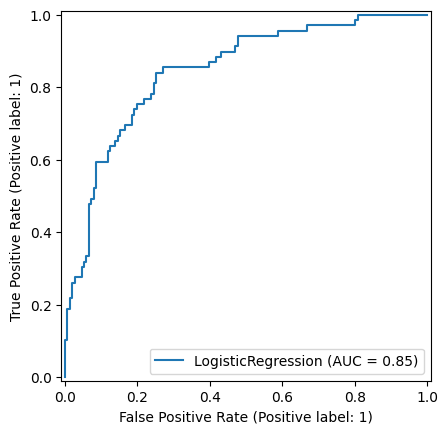

In [67]:
RocCurveDisplay.from_estimator(model, X_test, y_test)

## Balance the dataset

In [83]:
from imblearn.over_sampling import RandomOverSampler

In [84]:
OverSampler = RandomOverSampler(random_state=101 , sampling_strategy='minority')
X_oversampler, y_oversampler = OverSampler.fit_resample(X,y)


In [85]:
X_os_train, X_os_test, y_os_train, y_os_test = train_test_split(X_oversampler, y_oversampler, test_size=0.2, random_state=101)

In [86]:
numerical_features = ['Pregnancies','Glucose', 'BloodPressure','SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' ]
scaler_os = StandardScaler()
X_os_train[numerical_features] = scaler_os.fit_transform(X_os_train[numerical_features])
X_os_test[numerical_features] = scaler_os.transform(X_os_test[numerical_features])

In [89]:
X_os_train.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgeGroup_20-24,AgeGroup_25-29,AgeGroup_30-34,AgeGroup_35-39,AgeGroup_40-44,AgeGroup_45-49,AgeGroup_50-59,AgeGroup_60-81
497,0.245571,0.058400,0.554167,0.205870,-0.702601,1.058696,-0.421499,0.226866,False,False,False,True,False,False,False,False
172,-0.335488,1.396141,-0.084506,0.314939,0.381034,-0.007835,-0.862824,-0.884343,True,False,False,False,False,False,False,False
798,-0.626017,2.224266,-0.244174,7.513510,-0.702601,0.186080,0.266006,2.363805,False,False,False,False,False,False,False,True
147,-1.207076,-0.737874,-0.723178,-0.775753,0.228522,-0.769643,-0.097261,-0.969820,True,False,False,False,False,False,False,False
449,1.698218,1.300588,0.075162,0.205870,-0.702601,0.643165,0.151922,-0.029567,False,False,True,False,False,False,False,False
514,-0.335488,-1.215638,0.075162,-1.539238,-0.020313,-0.409516,0.193953,0.312343,False,False,False,True,False,False,False,False
184,-1.207076,-0.037153,0.873503,-0.121338,1.023188,-0.367963,0.100884,-0.884343,True,False,False,False,False,False,False,False
189,-0.044958,-0.323811,-0.723178,-0.339476,0.260630,-0.021686,-0.769755,-0.884343,True,False,False,False,False,False,False,False
274,-1.207076,-1.024533,0.554167,1.623770,0.035876,0.435399,-0.469535,-0.713388,False,True,False,False,False,False,False,False
668,-0.916546,1.300588,1.192839,-0.121338,-0.702601,0.227633,1.256733,1.509029,False,False,False,False,False,False,True,False


In [87]:
model_os = LogisticRegression()
model_os.fit(X_os_train, y_os_train)

LogisticRegression()

In [88]:
y_os_pred = model_os.predict(X_os_test)
print("Accuracy: {:.2f}".format(accuracy_score(y_os_test, y_os_pred)))
print("Confusion Matrix:\n", confusion_matrix(y_os_test, y_os_pred))
print("Classification Report:\n", classification_report(y_os_test, y_os_pred))

Accuracy: 0.76
Confusion Matrix:
 [[77 19]
 [28 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.77        96
           1       0.78      0.71      0.75        97

    accuracy                           0.76       193
   macro avg       0.76      0.76      0.76       193
weighted avg       0.76      0.76      0.76       193

